In [1]:
# import libraries

In [2]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [3]:
# read data and check how many class in train set

In [4]:
my_data_dir = 'data'

In [5]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train', 'validation']

In [6]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'
validation_path = my_data_dir+'\\validation\\'

In [7]:
os.listdir(test_path)

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '1007

In [8]:
os.listdir(train_path)

['cat', 'dog']

In [9]:
os.listdir(validation_path)

['cat', 'dog']

**Let's check how many images there are.**

In [10]:
#number of cat images in train set
len(os.listdir(train_path + "\\cat"))

12500

In [11]:
#number of dog images in train set
len(os.listdir(train_path + "\\dog"))

5026

In [12]:
#take cat image at index 0 from train set
os.listdir(train_path+'\\cat')[0]

'cat.0.jpg'

In [13]:
#take dog image at index 1 from train set
os.listdir(train_path+'\\dog')[1]

'2464.jpg'

In [14]:
#compare their shapes
cat_img = imread(train_path + "\\cat\\cat.0.jpg")
cat_img.shape

(374, 500, 3)

In [15]:
dog_img = imread(train_path + "\\dog\\2464.jpg")
dog_img.shape

(374, 500, 3)

In [16]:
os.listdir(validation_path+'\\cat')[0]

'10.jpg'

In [17]:
os.listdir(validation_path+'\\dog')[1]

'1000.jpg'

In [18]:
cat_img_val = imread(validation_path + "\\cat\\10.jpg")
dog_img_val = imread(validation_path + "\\dog\\1.jpg")

In [19]:
os.listdir(test_path)[0]

'10000.jpg'

In [20]:
img_test = imread(test_path + "10000.jpg")

In [21]:
for image in os.listdir(train_path+'\\cat'):
    print(imread(train_path+'\\cat'+'\\'+image).shape)

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(149, 150, 3)
(359, 431, 3)
(374, 500, 3)
(471, 499, 3)
(375, 499, 3)
(239, 320, 3)
(177, 319, 3)
(320, 460, 3)
(300, 219, 3)
(374, 500, 3)
(500, 472, 3)
(499, 336, 3)
(386, 499, 3)
(448, 357, 3)
(166, 250, 3)
(374, 500, 3)
(500, 372, 3)
(339, 500, 3)
(198, 179, 3)
(280, 500, 3)
(454, 499, 3)
(301, 246, 3)
(407, 379, 3)
(423, 320, 3)
(417, 423, 3)
(448, 500, 3)
(336, 349, 3)
(431, 325, 3)
(251, 153, 3)
(491, 400, 3)
(332, 500, 3)
(134, 180, 3)
(500, 385, 3)
(269, 259, 3)
(462, 500, 3)
(374, 500, 3)
(120, 159, 3)
(374, 500, 3)
(390, 500, 3)
(391, 356, 3)
(263, 300, 3)
(276, 434, 3)
(300, 299, 3)
(500, 360, 3)
(375, 499, 3)
(375, 499, 3)
(440, 500, 3)
(480, 319, 3)
(406, 500, 3)
(273, 378, 3)
(374, 500, 3)
(336, 373, 3)
(500, 451, 3)
(384, 385, 3)
(422, 231, 3)
(333, 500, 3)
(469, 450, 3)
(450, 432, 3)
(500, 345, 3)
(400, 299, 3)
(390, 499, 3)
(403, 499, 3)
(299, 248, 3)
(500, 331, 3)
(462, 499, 3)
(394, 432, 3)
(375, 499, 3)
(427, 

(439, 282, 3)
(318, 300, 3)
(374, 500, 3)
(224, 181, 3)
(333, 499, 3)
(224, 150, 3)
(400, 399, 3)
(415, 466, 3)
(375, 499, 3)
(500, 374, 3)
(326, 500, 3)
(375, 499, 3)
(402, 446, 3)
(310, 311, 3)
(188, 249, 3)
(227, 199, 3)
(319, 500, 3)
(328, 441, 3)
(476, 482, 3)
(500, 437, 3)
(374, 500, 3)
(369, 499, 3)
(375, 499, 3)
(341, 449, 3)
(374, 500, 3)
(353, 328, 3)
(242, 319, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(332, 500, 3)
(375, 499, 3)
(500, 256, 3)
(299, 399, 3)
(374, 500, 3)
(374, 500, 3)
(465, 499, 3)
(409, 499, 3)
(374, 500, 3)
(240, 319, 3)
(282, 440, 3)
(374, 500, 3)
(499, 389, 3)
(392, 499, 3)
(334, 499, 3)
(374, 500, 3)
(499, 375, 3)
(334, 500, 3)
(334, 499, 3)
(374, 500, 3)
(226, 275, 3)
(374, 500, 3)
(500, 374, 3)
(398, 499, 3)
(500, 433, 3)
(360, 479, 3)
(376, 500, 3)
(341, 284, 3)
(338, 449, 3)
(324, 349, 3)
(239, 240, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(149, 191, 3)
(364, 499, 3)
(372, 500, 3)
(424, 499, 3)
(375, 499, 3)
(261, 149, 3)
(239, 320, 3)
(370, 

(373, 500, 3)
(338, 500, 3)
(375, 499, 3)
(360, 436, 3)
(499, 434, 3)
(221, 364, 3)
(334, 350, 3)
(105, 161, 3)
(375, 499, 3)
(303, 447, 3)
(324, 431, 3)
(302, 499, 3)
(375, 499, 3)
(400, 225, 3)
(402, 499, 3)
(307, 499, 3)
(332, 499, 3)
(332, 500, 3)
(239, 167, 3)
(469, 479, 3)
(333, 499, 3)
(374, 500, 3)
(414, 333, 3)
(375, 499, 3)
(375, 499, 3)
(436, 500, 3)
(374, 500, 3)
(281, 349, 3)
(82, 89, 3)
(299, 499, 3)
(374, 500, 3)
(88, 99, 3)
(224, 300, 3)
(124, 191, 3)
(374, 500, 3)
(375, 499, 3)
(499, 355, 3)
(356, 299, 3)
(161, 134, 3)
(269, 356, 3)
(500, 306, 3)
(499, 440, 3)
(315, 279, 3)
(374, 500, 3)
(383, 499, 3)
(375, 499, 3)
(375, 499, 3)
(283, 237, 3)
(105, 139, 3)
(375, 499, 3)
(333, 499, 3)
(374, 500, 3)
(375, 499, 3)
(186, 179, 3)
(405, 499, 3)
(222, 249, 3)
(374, 500, 3)
(499, 375, 3)
(374, 500, 3)
(332, 500, 3)
(499, 480, 3)
(307, 499, 3)
(499, 382, 3)
(499, 329, 3)
(142, 191, 3)
(375, 499, 3)
(372, 493, 3)
(463, 350, 3)
(375, 499, 3)
(500, 425, 3)
(425, 320, 3)
(325, 349,

(393, 400, 3)
(319, 287, 3)
(375, 499, 3)
(374, 500, 3)
(375, 499, 3)
(308, 286, 3)
(374, 500, 3)
(427, 499, 3)
(375, 499, 3)
(375, 499, 3)
(449, 500, 3)
(347, 499, 3)
(336, 344, 3)
(337, 415, 3)
(375, 499, 3)
(375, 499, 3)
(330, 499, 3)
(347, 500, 3)
(270, 359, 3)
(397, 272, 3)
(498, 499, 3)
(499, 437, 3)
(200, 159, 3)
(374, 500, 3)
(400, 499, 3)
(266, 399, 3)
(152, 400, 3)
(332, 500, 3)
(499, 425, 3)
(152, 215, 3)
(197, 199, 3)
(227, 300, 3)
(274, 500, 3)
(500, 421, 3)
(375, 499, 3)
(500, 374, 3)
(464, 491, 3)
(225, 299, 3)
(332, 500, 3)
(172, 200, 3)
(500, 380, 3)
(357, 500, 3)
(336, 346, 3)
(374, 500, 3)
(374, 499, 3)
(299, 303, 3)
(337, 451, 3)
(348, 499, 3)
(374, 500, 3)
(352, 500, 3)
(492, 320, 3)
(406, 499, 3)
(240, 239, 3)
(441, 500, 3)
(375, 499, 3)
(500, 418, 3)
(335, 427, 3)
(374, 500, 3)
(386, 499, 3)
(374, 500, 3)
(374, 500, 3)
(189, 249, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(408, 500, 3)
(374, 500, 3)
(415, 398, 3)
(432, 500, 3)
(270, 201, 3)
(421, 499, 3)
(375, 

(374, 500, 3)
(367, 500, 3)
(375, 499, 3)
(374, 500, 3)
(461, 500, 3)
(374, 500, 3)
(374, 500, 3)
(499, 399, 3)
(348, 449, 3)
(375, 499, 3)
(261, 350, 3)
(225, 299, 3)
(270, 359, 3)
(500, 468, 3)
(374, 500, 3)
(399, 500, 3)
(468, 499, 3)
(486, 467, 3)
(375, 499, 3)
(240, 319, 3)
(450, 399, 3)
(365, 356, 3)
(333, 499, 3)
(239, 320, 3)
(399, 353, 3)
(342, 288, 3)
(331, 500, 3)
(500, 452, 3)
(171, 184, 3)
(351, 287, 3)
(468, 499, 3)
(499, 372, 3)
(262, 225, 3)
(499, 461, 3)
(374, 500, 3)
(358, 499, 3)
(499, 375, 3)
(500, 338, 3)
(142, 199, 3)
(375, 499, 3)
(375, 499, 3)
(499, 416, 3)
(374, 500, 3)
(365, 500, 3)
(279, 360, 3)
(375, 499, 3)
(500, 468, 3)
(404, 288, 3)
(375, 499, 3)
(240, 319, 3)
(269, 239, 3)
(413, 500, 3)
(361, 499, 3)
(408, 307, 3)
(499, 361, 3)
(239, 320, 3)
(269, 499, 3)
(240, 319, 3)
(304, 499, 3)
(500, 374, 3)
(499, 375, 3)
(499, 315, 3)
(264, 299, 3)
(255, 339, 3)
(374, 500, 3)
(499, 428, 3)
(388, 500, 3)
(499, 467, 3)
(312, 355, 3)
(375, 499, 3)
(376, 499, 3)
(337, 

(331, 500, 3)
(239, 320, 3)
(395, 499, 3)
(375, 500, 3)
(374, 500, 3)
(366, 430, 3)
(499, 364, 3)
(327, 215, 3)
(119, 80, 3)
(375, 500, 3)
(109, 185, 3)
(499, 330, 3)
(342, 317, 3)
(374, 500, 3)
(248, 500, 3)
(374, 500, 3)
(375, 499, 3)
(335, 424, 3)
(374, 500, 3)
(299, 400, 3)
(375, 499, 3)
(379, 499, 3)
(497, 499, 3)
(499, 375, 3)
(500, 333, 3)
(331, 500, 3)
(429, 480, 3)
(421, 499, 3)
(374, 500, 3)
(333, 500, 3)
(239, 320, 3)
(374, 500, 3)
(373, 500, 3)
(374, 500, 3)
(360, 479, 3)
(212, 299, 3)
(374, 500, 3)
(230, 306, 3)
(332, 499, 3)
(404, 306, 3)
(374, 500, 3)
(499, 470, 3)
(374, 500, 3)
(335, 437, 3)
(349, 383, 3)
(500, 312, 3)
(375, 499, 3)
(329, 499, 3)
(226, 300, 3)
(351, 469, 3)
(375, 499, 3)
(375, 499, 3)
(353, 405, 3)
(375, 499, 3)
(500, 490, 3)
(279, 350, 3)
(479, 400, 3)
(374, 500, 3)
(499, 387, 3)
(255, 199, 3)
(375, 499, 3)
(124, 143, 3)
(376, 499, 3)
(334, 377, 3)
(375, 499, 3)
(200, 263, 3)
(375, 499, 3)
(495, 500, 3)
(290, 237, 3)
(261, 354, 3)
(407, 500, 3)
(382, 4

(374, 500, 3)
(396, 312, 3)
(374, 500, 3)
(374, 500, 3)
(499, 459, 3)
(323, 499, 3)
(449, 499, 3)
(189, 240, 3)
(196, 193, 3)
(366, 349, 3)
(447, 336, 3)
(400, 499, 3)
(476, 500, 3)
(308, 400, 3)
(309, 399, 3)
(374, 499, 3)
(500, 471, 3)
(375, 499, 3)
(239, 240, 3)
(500, 394, 3)
(299, 400, 3)
(273, 249, 3)
(299, 300, 3)
(384, 449, 3)
(374, 500, 3)
(240, 238, 3)
(393, 499, 3)
(360, 479, 3)
(375, 499, 3)
(225, 299, 3)
(247, 197, 3)
(160, 199, 3)
(339, 306, 3)
(374, 499, 3)
(375, 499, 3)
(364, 500, 3)
(417, 500, 3)
(450, 499, 3)
(500, 317, 3)
(500, 374, 3)
(442, 480, 3)
(375, 499, 3)
(344, 499, 3)
(123, 125, 3)
(375, 499, 3)
(375, 499, 3)
(375, 499, 3)
(225, 276, 3)
(329, 499, 3)
(385, 500, 3)
(378, 500, 3)
(427, 500, 3)
(375, 499, 3)
(262, 349, 3)
(374, 500, 3)
(374, 500, 3)
(365, 439, 3)
(213, 319, 3)
(258, 500, 3)
(278, 300, 3)
(500, 394, 3)
(319, 414, 3)
(374, 500, 3)
(499, 375, 3)
(161, 252, 3)
(374, 500, 3)
(360, 399, 3)
(499, 500, 3)
(299, 200, 3)
(500, 374, 3)
(375, 499, 3)
(375, 

(500, 474, 3)
(386, 499, 3)
(129, 153, 3)
(373, 500, 3)
(251, 324, 3)
(449, 477, 3)
(331, 500, 3)
(249, 126, 3)
(161, 199, 3)
(261, 350, 3)
(367, 300, 3)
(374, 500, 3)
(436, 500, 3)
(480, 359, 3)
(500, 358, 3)
(375, 499, 3)
(250, 211, 3)
(499, 396, 3)
(239, 320, 3)
(480, 424, 3)
(411, 499, 3)
(374, 500, 3)
(393, 499, 3)
(307, 206, 3)
(500, 499, 3)
(149, 200, 3)
(305, 350, 3)
(500, 478, 3)
(156, 207, 3)
(468, 500, 3)
(431, 312, 3)
(374, 500, 3)
(264, 400, 3)
(269, 360, 3)
(357, 499, 3)
(316, 230, 3)
(374, 500, 3)
(374, 500, 3)
(375, 499, 3)
(299, 400, 3)
(143, 135, 3)
(375, 499, 3)
(375, 499, 3)
(428, 500, 3)
(374, 500, 3)
(200, 149, 3)
(322, 299, 3)
(194, 255, 3)
(230, 204, 3)
(376, 500, 3)
(246, 234, 3)
(374, 500, 3)
(497, 499, 3)
(179, 186, 3)
(200, 140, 3)
(270, 359, 3)
(375, 499, 3)
(269, 360, 3)
(342, 257, 3)
(500, 321, 3)
(333, 499, 3)
(374, 500, 3)
(374, 500, 3)
(500, 454, 3)
(375, 499, 3)
(374, 500, 3)
(374, 500, 3)
(406, 499, 3)
(500, 426, 3)
(374, 500, 3)
(500, 438, 3)
(374, 

(500, 476, 3)
(374, 500, 3)
(291, 300, 3)
(374, 500, 3)
(499, 306, 3)
(373, 470, 3)
(426, 499, 3)
(435, 499, 3)
(301, 403, 3)
(375, 499, 3)
(375, 499, 3)
(356, 500, 3)
(296, 299, 3)
(480, 318, 3)
(361, 400, 3)
(374, 500, 3)
(500, 374, 3)
(499, 500, 3)
(436, 495, 3)
(375, 499, 3)
(411, 299, 3)
(499, 320, 3)
(500, 416, 3)
(500, 247, 3)
(375, 499, 3)
(374, 500, 3)
(239, 360, 3)
(375, 499, 3)
(499, 375, 3)
(292, 499, 3)
(463, 439, 3)
(374, 499, 3)
(446, 439, 3)
(134, 184, 3)
(199, 200, 3)
(272, 414, 3)
(499, 375, 3)
(258, 500, 3)
(375, 499, 3)
(277, 448, 3)
(240, 319, 3)
(380, 499, 3)
(359, 216, 3)
(480, 459, 3)
(235, 249, 3)
(324, 431, 3)
(311, 300, 3)
(164, 215, 3)
(235, 344, 3)
(481, 499, 3)
(374, 500, 3)
(447, 500, 3)
(383, 384, 3)
(351, 500, 3)
(423, 313, 3)
(374, 500, 3)
(499, 496, 3)
(336, 447, 3)
(339, 500, 3)
(239, 320, 3)
(499, 335, 3)
(485, 500, 3)
(450, 500, 3)
(279, 379, 3)
(224, 300, 3)
(499, 473, 3)
(250, 185, 3)
(398, 499, 3)
(299, 447, 3)
(374, 500, 3)
(360, 500, 3)
(179, 

(500, 386, 3)
(363, 500, 3)
(375, 499, 3)
(410, 499, 3)
(375, 499, 3)
(374, 500, 3)
(294, 350, 3)
(235, 273, 3)
(331, 500, 3)
(499, 475, 3)
(344, 258, 3)
(395, 500, 3)
(83, 190, 3)
(350, 424, 3)
(374, 500, 3)
(500, 315, 3)
(248, 300, 3)
(59, 96, 3)
(374, 500, 3)
(291, 500, 3)
(374, 500, 3)
(375, 499, 3)
(207, 300, 3)
(225, 299, 3)
(415, 500, 3)
(461, 352, 3)
(389, 287, 3)
(260, 339, 3)
(500, 436, 3)
(380, 499, 3)
(407, 499, 3)
(414, 466, 3)
(374, 499, 3)
(194, 145, 3)
(374, 500, 3)
(375, 499, 3)
(150, 199, 3)
(333, 499, 3)
(239, 186, 3)
(382, 499, 3)
(331, 500, 3)
(469, 473, 3)
(449, 432, 3)
(358, 479, 3)
(499, 341, 3)
(375, 499, 3)
(500, 371, 3)
(400, 335, 3)
(500, 332, 3)
(375, 499, 3)
(374, 500, 3)
(374, 500, 3)
(200, 217, 3)
(374, 500, 3)
(299, 350, 3)
(375, 499, 3)
(344, 499, 3)
(375, 299, 3)
(460, 499, 3)
(300, 399, 3)
(379, 316, 3)
(500, 449, 3)
(200, 239, 3)
(385, 349, 3)
(298, 222, 3)
(374, 500, 3)
(239, 320, 3)
(500, 411, 3)
(319, 375, 3)
(499, 496, 3)
(375, 499, 3)
(408, 500

(500, 333, 3)
(500, 324, 3)
(217, 350, 3)
(269, 360, 3)
(266, 354, 3)
(400, 499, 3)
(276, 300, 3)
(468, 477, 3)
(400, 499, 3)
(299, 400, 3)
(375, 499, 3)
(413, 480, 3)
(500, 400, 3)
(467, 499, 3)
(187, 250, 3)
(317, 499, 3)
(375, 499, 3)
(375, 499, 3)
(343, 430, 3)
(473, 500, 3)
(374, 500, 3)
(332, 499, 3)
(365, 490, 3)
(479, 500, 3)
(319, 246, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(349, 499, 3)
(499, 333, 3)
(343, 500, 3)
(230, 412, 3)
(374, 500, 3)
(192, 195, 3)
(173, 237, 3)
(410, 500, 3)
(489, 500, 3)
(375, 499, 3)
(217, 179, 3)
(300, 399, 3)
(414, 500, 3)
(217, 283, 3)
(374, 500, 3)
(352, 447, 3)
(487, 499, 3)
(375, 499, 3)
(260, 339, 3)
(377, 500, 3)
(334, 499, 3)
(500, 395, 3)
(162, 170, 3)
(269, 272, 3)
(315, 335, 3)
(471, 499, 3)
(375, 499, 3)
(374, 500, 3)
(299, 300, 3)
(333, 499, 3)
(374, 500, 3)
(239, 320, 3)
(332, 499, 3)
(333, 499, 3)
(374, 500, 3)
(234, 300, 3)
(340, 453, 3)
(374, 500, 3)
(336, 447, 3)
(375, 499, 3)
(375, 499, 3)
(374, 500, 3)
(429, 500, 3)
(269, 

(338, 449, 3)
(358, 300, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(500, 268, 3)
(435, 356, 3)
(270, 279, 3)
(343, 256, 3)
(376, 500, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(374, 499, 3)
(245, 500, 3)
(374, 500, 3)
(499, 375, 3)
(251, 359, 3)
(374, 500, 3)
(499, 402, 3)
(347, 499, 3)
(375, 499, 3)
(374, 500, 3)
(374, 500, 3)
(302, 321, 3)
(375, 499, 3)
(137, 184, 3)
(339, 431, 3)
(274, 275, 3)
(375, 499, 3)
(123, 192, 3)
(417, 499, 3)
(232, 350, 3)
(499, 340, 3)
(287, 431, 3)
(360, 479, 3)
(499, 333, 3)
(500, 386, 3)
(199, 128, 3)
(500, 462, 3)
(285, 448, 3)
(375, 499, 3)
(464, 499, 3)
(374, 500, 3)
(322, 479, 3)
(373, 380, 3)
(374, 500, 3)
(499, 339, 3)
(93, 188, 3)
(239, 320, 3)
(375, 499, 3)
(375, 499, 3)
(288, 498, 3)
(374, 500, 3)
(149, 142, 3)
(499, 481, 3)
(374, 500, 3)
(500, 299, 3)
(374, 500, 3)
(356, 499, 3)
(377, 499, 3)
(499, 410, 3)
(360, 264, 3)
(374, 499, 3)
(362, 387, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(371, 499, 3)
(240, 319, 3)
(336, 337, 3)
(374, 5

(348, 380, 3)
(270, 249, 3)
(499, 464, 3)
(400, 399, 3)
(195, 300, 3)
(417, 500, 3)
(239, 320, 3)
(374, 500, 3)
(305, 449, 3)
(499, 500, 3)
(499, 500, 3)
(310, 412, 3)
(359, 343, 3)
(239, 320, 3)
(374, 500, 3)
(332, 499, 3)
(426, 499, 3)
(458, 499, 3)
(333, 499, 3)
(374, 499, 3)
(375, 499, 3)
(335, 448, 3)
(360, 237, 3)
(442, 464, 3)
(499, 399, 3)
(500, 488, 3)
(200, 196, 3)
(373, 499, 3)
(499, 454, 3)
(435, 500, 3)
(499, 375, 3)
(149, 198, 3)
(375, 499, 3)
(396, 500, 3)
(457, 492, 3)
(375, 499, 3)
(357, 249, 3)
(359, 480, 3)
(375, 499, 3)
(239, 320, 3)
(261, 350, 3)
(335, 499, 3)
(352, 400, 3)
(499, 444, 3)
(300, 262, 3)
(397, 500, 3)
(451, 352, 3)
(143, 185, 3)
(399, 500, 3)
(361, 463, 3)
(368, 278, 3)
(375, 499, 3)
(292, 359, 3)
(375, 499, 3)
(216, 215, 3)
(374, 500, 3)
(384, 500, 3)
(289, 500, 3)
(447, 500, 3)
(499, 464, 3)
(289, 387, 3)
(348, 500, 3)
(204, 200, 3)
(376, 500, 3)
(499, 421, 3)
(354, 364, 3)
(224, 300, 3)
(500, 401, 3)
(440, 338, 3)
(411, 488, 3)
(499, 431, 3)
(374, 

(432, 248, 3)
(500, 488, 3)
(456, 500, 3)
(412, 500, 3)
(375, 499, 3)
(431, 276, 3)
(338, 499, 3)
(116, 166, 3)
(240, 319, 3)
(179, 245, 3)
(374, 500, 3)
(472, 304, 3)
(208, 339, 3)
(299, 273, 3)
(384, 500, 3)
(434, 499, 3)
(499, 443, 3)
(500, 412, 3)
(374, 500, 3)
(380, 500, 3)
(416, 450, 3)
(192, 287, 3)
(500, 432, 3)
(374, 500, 3)
(379, 197, 3)
(375, 499, 3)
(325, 264, 3)
(135, 124, 3)
(244, 399, 3)
(253, 400, 3)
(375, 499, 3)
(182, 180, 3)
(375, 499, 3)
(374, 500, 3)
(373, 500, 3)
(432, 266, 3)
(413, 500, 3)
(421, 255, 3)
(445, 500, 3)
(374, 500, 3)
(375, 499, 3)
(500, 247, 3)
(288, 499, 3)
(374, 500, 3)
(252, 319, 3)
(500, 331, 3)
(374, 500, 3)
(448, 466, 3)
(192, 199, 3)
(215, 389, 3)
(499, 330, 3)
(375, 499, 3)
(499, 499, 3)
(228, 212, 3)
(198, 180, 3)
(321, 500, 3)
(500, 332, 3)
(500, 436, 3)
(204, 294, 3)
(374, 500, 3)
(499, 489, 3)
(239, 255, 3)
(277, 500, 3)
(322, 243, 3)
(374, 500, 3)
(500, 442, 3)
(500, 454, 3)
(375, 499, 3)
(200, 199, 3)
(375, 499, 3)
(480, 365, 3)
(375, 

(373, 500, 3)
(375, 499, 3)
(473, 499, 3)
(500, 374, 3)
(485, 360, 3)
(370, 499, 3)
(329, 500, 3)
(332, 499, 3)
(373, 500, 3)
(224, 300, 3)
(333, 499, 3)
(372, 500, 3)
(499, 411, 3)
(475, 500, 3)
(255, 384, 3)
(394, 386, 3)
(379, 319, 3)
(373, 500, 3)
(374, 500, 3)
(370, 500, 3)
(499, 278, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(380, 418, 3)
(417, 500, 3)
(309, 412, 3)
(375, 499, 3)
(310, 319, 3)
(195, 199, 3)
(229, 350, 3)
(233, 319, 3)
(225, 299, 3)
(374, 500, 3)
(499, 360, 3)
(500, 465, 3)
(375, 499, 3)
(302, 298, 3)
(466, 499, 3)
(374, 500, 3)
(275, 375, 3)
(305, 499, 3)
(500, 332, 3)
(99, 130, 3)
(500, 391, 3)
(399, 500, 3)
(332, 500, 3)
(374, 500, 3)
(375, 499, 3)
(332, 500, 3)
(454, 274, 3)
(434, 457, 3)
(317, 336, 3)
(374, 500, 3)
(249, 250, 3)
(298, 499, 3)
(420, 499, 3)
(374, 500, 3)
(374, 500, 3)
(499, 398, 3)
(240, 319, 3)
(185, 244, 3)
(32, 60, 3)
(375, 499, 3)
(123, 199, 3)
(375, 499, 3)
(233, 349, 3)
(179, 240, 3)
(375, 499, 3)
(375, 499, 3)
(375, 499, 3)
(389, 499

(483, 416, 3)
(299, 187, 3)
(425, 499, 3)
(424, 499, 3)
(207, 238, 3)
(374, 500, 3)
(150, 225, 3)
(255, 499, 3)
(360, 399, 3)
(500, 325, 3)
(375, 499, 3)
(386, 500, 3)
(374, 500, 3)
(248, 288, 3)
(120, 159, 3)
(375, 499, 3)
(175, 232, 3)
(374, 500, 3)
(373, 500, 3)
(346, 499, 3)
(194, 260, 3)
(374, 500, 3)
(148, 223, 3)
(500, 444, 3)
(198, 239, 3)
(287, 432, 3)
(275, 348, 3)
(374, 500, 3)
(266, 275, 3)
(500, 430, 3)
(375, 499, 3)
(499, 375, 3)
(251, 184, 3)
(295, 480, 3)
(375, 499, 3)
(453, 500, 3)
(500, 374, 3)
(331, 499, 3)
(299, 225, 3)
(374, 500, 3)
(375, 499, 3)
(376, 500, 3)
(499, 394, 3)
(375, 499, 3)
(374, 500, 3)
(315, 399, 3)
(378, 500, 3)
(374, 499, 3)
(414, 319, 3)
(270, 337, 3)
(375, 499, 3)
(374, 500, 3)
(323, 500, 3)
(375, 499, 3)
(410, 419, 3)
(375, 499, 3)
(374, 500, 3)
(177, 200, 3)
(374, 500, 3)
(396, 500, 3)
(374, 500, 3)
(333, 499, 3)
(139, 150, 3)
(387, 283, 3)
(375, 499, 3)
(324, 350, 3)
(479, 422, 3)
(374, 500, 3)
(499, 375, 3)
(480, 359, 3)
(330, 498, 3)
(376, 

(272, 299, 3)
(500, 296, 3)
(156, 349, 3)
(374, 500, 3)
(359, 480, 3)
(326, 434, 3)
(346, 500, 3)
(375, 499, 3)
(412, 500, 3)
(468, 300, 3)
(374, 500, 3)
(293, 499, 3)
(339, 496, 3)
(333, 499, 3)
(375, 499, 3)
(500, 379, 3)
(240, 359, 3)
(187, 320, 3)
(499, 375, 3)
(374, 500, 3)
(261, 249, 3)
(375, 499, 3)
(374, 500, 3)
(269, 360, 3)
(375, 499, 3)
(499, 300, 3)
(240, 319, 3)
(269, 338, 3)
(399, 408, 3)
(374, 500, 3)
(374, 500, 3)
(253, 499, 3)
(500, 418, 3)
(500, 332, 3)
(188, 249, 3)
(399, 500, 3)
(356, 500, 3)
(454, 499, 3)
(375, 499, 3)
(369, 500, 3)
(374, 500, 3)
(448, 302, 3)
(372, 384, 3)
(452, 439, 3)
(312, 499, 3)
(488, 500, 3)
(349, 259, 3)
(374, 500, 3)
(425, 499, 3)
(499, 307, 3)
(375, 499, 3)
(331, 500, 3)
(434, 499, 3)
(499, 493, 3)
(89, 54, 3)
(435, 411, 3)
(375, 499, 3)
(340, 499, 3)
(375, 499, 3)
(239, 320, 3)
(374, 500, 3)
(500, 299, 3)
(500, 332, 3)
(375, 499, 3)
(375, 499, 3)
(448, 335, 3)
(375, 499, 3)
(375, 499, 3)
(396, 495, 3)
(374, 500, 3)
(374, 500, 3)
(499, 34

(280, 212, 3)
(375, 499, 3)
(374, 500, 3)
(346, 349, 3)
(418, 499, 3)
(374, 500, 3)
(375, 499, 3)
(406, 500, 3)
(375, 499, 3)
(180, 150, 3)
(221, 193, 3)
(452, 399, 3)
(389, 500, 3)
(333, 499, 3)
(374, 500, 3)
(445, 499, 3)
(332, 500, 3)
(375, 499, 3)
(293, 376, 3)
(379, 321, 3)
(499, 386, 3)
(500, 493, 3)
(262, 349, 3)
(491, 439, 3)
(345, 461, 3)
(234, 319, 3)
(359, 480, 3)
(396, 296, 3)
(373, 499, 3)
(500, 283, 3)
(484, 431, 3)
(262, 349, 3)
(499, 374, 3)
(374, 500, 3)
(135, 150, 3)
(333, 499, 3)
(375, 499, 3)
(359, 306, 3)
(186, 280, 3)
(400, 398, 3)
(198, 118, 3)
(306, 320, 3)
(346, 234, 3)
(454, 499, 3)
(410, 500, 3)
(208, 199, 3)
(447, 259, 3)
(273, 499, 3)
(314, 500, 3)
(461, 499, 3)
(338, 449, 3)
(375, 499, 3)
(500, 431, 3)
(375, 499, 3)
(500, 438, 3)
(374, 500, 3)
(140, 149, 3)
(402, 470, 3)
(263, 349, 3)
(332, 500, 3)
(374, 500, 3)
(354, 239, 3)
(500, 498, 3)
(374, 500, 3)
(431, 305, 3)
(414, 499, 3)
(401, 274, 3)
(374, 500, 3)
(240, 319, 3)
(374, 500, 3)
(374, 500, 3)
(181, 

(405, 500, 3)
(500, 325, 3)
(500, 410, 3)
(319, 240, 3)
(269, 271, 3)
(247, 267, 3)
(283, 360, 3)
(432, 431, 3)
(225, 276, 3)
(224, 300, 3)
(301, 499, 3)
(499, 472, 3)
(309, 410, 3)
(102, 99, 3)
(346, 350, 3)
(374, 500, 3)
(375, 499, 3)
(499, 375, 3)
(409, 306, 3)
(126, 180, 3)
(449, 499, 3)
(498, 374, 3)
(185, 500, 3)
(499, 325, 3)
(343, 287, 3)
(375, 499, 3)
(456, 499, 3)
(374, 224, 3)
(500, 374, 3)
(333, 499, 3)
(337, 450, 3)
(433, 422, 3)
(374, 500, 3)
(375, 499, 3)
(288, 383, 3)
(499, 375, 3)
(319, 487, 3)
(333, 499, 3)
(182, 249, 3)
(448, 358, 3)
(250, 238, 3)
(499, 331, 3)
(293, 400, 3)
(300, 349, 3)
(500, 355, 3)
(204, 290, 3)
(246, 320, 3)
(370, 500, 3)
(374, 500, 3)
(352, 400, 3)
(374, 500, 3)
(374, 500, 3)
(374, 500, 3)
(374, 500, 3)
(268, 498, 3)
(350, 299, 3)
(374, 500, 3)
(286, 499, 3)
(375, 499, 3)
(375, 499, 3)
(259, 399, 3)
(224, 295, 3)
(375, 499, 3)
(239, 320, 3)
(500, 487, 3)
(336, 500, 3)
(375, 499, 3)
(374, 500, 3)
(499, 429, 3)
(69, 94, 3)
(318, 419, 3)
(333, 500

(465, 500, 3)
(300, 399, 3)
(310, 500, 3)
(414, 499, 3)
(215, 400, 3)
(375, 499, 3)
(330, 500, 3)
(411, 500, 3)
(259, 190, 3)
(294, 363, 3)
(374, 500, 3)
(333, 499, 3)
(200, 199, 3)
(337, 500, 3)
(375, 499, 3)
(103, 199, 3)
(374, 500, 3)
(374, 500, 3)
(420, 500, 3)
(327, 364, 3)
(286, 399, 3)
(239, 320, 3)
(259, 500, 3)
(499, 404, 3)
(239, 249, 3)
(332, 500, 3)
(374, 500, 3)
(499, 475, 3)
(124, 167, 3)
(375, 276, 3)
(331, 500, 3)
(375, 499, 3)
(220, 184, 3)
(500, 374, 3)
(500, 380, 3)
(375, 499, 3)
(314, 360, 3)
(210, 279, 3)
(315, 242, 3)
(374, 500, 3)
(499, 333, 3)
(423, 406, 3)
(373, 499, 3)
(188, 249, 3)
(331, 500, 3)
(333, 499, 3)
(500, 488, 3)
(495, 370, 3)
(374, 500, 3)
(374, 500, 3)
(374, 500, 3)
(375, 499, 3)
(234, 253, 3)
(400, 499, 3)
(288, 447, 3)
(499, 375, 3)
(499, 383, 3)
(374, 500, 3)
(378, 315, 3)
(375, 499, 3)
(402, 500, 3)
(350, 262, 3)
(287, 255, 3)
(374, 500, 3)
(303, 327, 3)
(471, 500, 3)
(239, 319, 3)
(432, 292, 3)
(299, 400, 3)
(499, 254, 3)
(361, 359, 3)
(375, 

(240, 252, 3)
(374, 500, 3)
(333, 499, 3)
(374, 500, 3)
(481, 499, 3)
(374, 500, 3)
(499, 480, 3)
(499, 447, 3)
(394, 400, 3)
(374, 500, 3)
(341, 500, 3)
(451, 499, 3)
(100, 99, 3)
(444, 391, 3)
(374, 500, 3)
(374, 500, 3)
(417, 500, 3)
(375, 499, 3)
(200, 165, 3)
(112, 148, 3)
(374, 500, 3)
(499, 286, 3)
(375, 499, 3)
(300, 399, 3)
(240, 319, 3)
(302, 500, 3)
(398, 349, 3)
(300, 399, 3)
(239, 320, 3)
(113, 149, 3)
(269, 360, 3)
(375, 499, 3)
(239, 240, 3)
(287, 400, 3)
(375, 499, 3)
(375, 499, 3)
(360, 311, 3)
(374, 500, 3)
(375, 499, 3)
(408, 500, 3)
(375, 499, 3)
(110, 100, 3)
(374, 500, 3)
(393, 500, 3)
(499, 500, 3)
(374, 500, 3)
(288, 198, 3)
(365, 499, 3)
(332, 500, 3)
(374, 500, 3)
(238, 253, 3)
(374, 500, 3)
(269, 318, 3)
(500, 318, 3)
(408, 500, 3)
(169, 153, 3)
(300, 399, 3)
(432, 401, 3)
(368, 468, 3)
(121, 181, 3)
(307, 500, 3)
(437, 499, 3)
(375, 499, 3)
(406, 500, 3)
(374, 500, 3)
(313, 458, 3)
(258, 485, 3)
(374, 500, 3)
(376, 500, 3)
(464, 500, 3)
(374, 500, 3)
(119, 1

In [22]:
for image in os.listdir(train_path+'\\dog'):
    print(imread(train_path+'\\dog'+'\\'+image).shape)

(286, 384, 3)
(374, 500, 3)
(389, 497, 3)
(275, 368, 3)
(500, 374, 3)
(374, 500, 3)
(500, 494, 3)
(305, 219, 3)
(270, 359, 3)
(375, 499, 3)
(108, 143, 3)
(332, 500, 3)
(447, 321, 3)
(374, 500, 3)
(333, 499, 3)
(375, 499, 3)
(500, 499, 3)
(180, 177, 3)
(332, 500, 3)
(499, 320, 3)
(375, 499, 3)
(235, 200, 3)
(374, 500, 3)
(374, 500, 3)
(240, 319, 3)
(479, 360, 3)
(332, 500, 3)
(497, 417, 3)
(287, 288, 3)
(291, 246, 3)
(362, 455, 3)
(398, 229, 3)
(200, 127, 3)
(359, 456, 3)
(366, 486, 3)
(400, 431, 3)
(499, 375, 3)
(282, 500, 3)
(109, 65, 3)
(467, 350, 3)
(465, 480, 3)
(495, 293, 3)
(374, 499, 3)
(442, 386, 3)
(374, 500, 3)
(391, 296, 3)
(421, 500, 3)
(500, 272, 3)
(499, 314, 3)
(246, 249, 3)
(375, 499, 3)
(500, 499, 3)
(499, 486, 3)
(395, 499, 3)
(430, 500, 3)
(350, 400, 3)
(287, 288, 3)
(374, 500, 3)
(332, 500, 3)
(265, 427, 3)
(335, 448, 3)
(239, 360, 3)
(354, 425, 3)
(375, 499, 3)
(365, 402, 3)
(375, 499, 3)
(375, 499, 3)
(240, 319, 3)
(350, 359, 3)
(434, 404, 3)
(314, 462, 3)
(317, 5

(500, 409, 3)
(171, 260, 3)
(393, 500, 3)
(433, 480, 3)
(480, 359, 3)
(375, 499, 3)
(489, 350, 3)
(396, 369, 3)
(348, 432, 3)
(149, 149, 3)
(196, 355, 3)
(75, 99, 3)
(375, 499, 3)
(351, 408, 3)
(375, 499, 3)
(375, 499, 3)
(499, 479, 3)
(300, 400, 3)
(375, 499, 3)
(332, 500, 3)
(374, 500, 3)
(417, 252, 3)
(432, 439, 3)
(261, 350, 3)
(240, 319, 3)
(208, 227, 3)
(375, 499, 3)
(375, 499, 3)
(375, 499, 3)
(171, 299, 3)
(160, 177, 3)
(418, 451, 3)
(250, 249, 3)
(332, 500, 3)
(213, 340, 3)
(375, 499, 3)
(292, 350, 3)
(239, 320, 3)
(267, 399, 3)
(465, 500, 3)
(375, 499, 3)
(305, 447, 3)
(375, 499, 3)
(500, 315, 3)
(375, 499, 3)
(261, 350, 3)
(499, 487, 3)
(359, 480, 3)
(318, 377, 3)
(225, 240, 3)
(375, 499, 3)
(269, 221, 3)
(435, 500, 3)
(430, 357, 3)
(220, 299, 3)
(400, 266, 3)
(287, 499, 3)
(349, 350, 3)
(375, 499, 3)
(261, 150, 3)
(436, 500, 3)
(116, 200, 3)
(374, 500, 3)
(471, 499, 3)
(201, 150, 3)
(375, 499, 3)
(334, 349, 3)
(374, 500, 3)
(378, 287, 3)
(465, 499, 3)
(373, 500, 3)
(182, 11

(332, 499, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(500, 374, 3)
(374, 500, 3)
(492, 425, 3)
(482, 499, 3)
(285, 334, 3)
(239, 320, 3)
(399, 479, 3)
(500, 443, 3)
(499, 375, 3)
(332, 500, 3)
(243, 349, 3)
(341, 454, 3)
(448, 270, 3)
(373, 500, 3)
(399, 363, 3)
(496, 500, 3)
(419, 320, 3)
(369, 452, 3)
(375, 499, 3)
(499, 330, 3)
(338, 229, 3)
(318, 499, 3)
(148, 199, 3)
(363, 500, 3)
(374, 500, 3)
(500, 346, 3)
(374, 500, 3)
(375, 374, 3)
(399, 500, 3)
(336, 500, 3)
(375, 499, 3)
(375, 499, 3)
(239, 320, 3)
(375, 499, 3)
(308, 200, 3)
(374, 500, 3)
(425, 499, 3)
(434, 499, 3)
(225, 299, 3)
(229, 312, 3)
(500, 405, 3)
(409, 275, 3)
(355, 350, 3)
(362, 471, 3)
(374, 500, 3)
(375, 499, 3)
(462, 399, 3)
(336, 447, 3)
(197, 359, 3)
(499, 351, 3)
(375, 499, 3)
(384, 350, 3)
(375, 499, 3)
(375, 499, 3)
(464, 456, 3)
(447, 336, 3)
(155, 199, 3)
(499, 367, 3)
(376, 500, 3)
(500, 460, 3)
(225, 299, 3)
(421, 300, 3)
(426, 499, 3)
(500, 490, 3)
(425, 500, 3)
(262, 349, 3)
(333, 500, 3)
(376, 

(496, 499, 3)
(499, 341, 3)
(125, 124, 3)
(443, 499, 3)
(375, 499, 3)
(374, 500, 3)
(500, 363, 3)
(375, 499, 3)
(500, 430, 3)
(410, 499, 3)
(500, 442, 3)
(63, 60, 3)
(499, 375, 3)
(224, 300, 3)
(425, 500, 3)
(144, 190, 3)
(375, 499, 3)
(375, 499, 3)
(368, 381, 3)
(321, 322, 3)
(373, 500, 3)
(374, 500, 3)
(374, 500, 3)
(335, 357, 3)
(374, 500, 3)
(417, 350, 3)
(425, 218, 3)
(375, 499, 3)
(457, 500, 3)
(375, 499, 3)
(341, 368, 3)
(239, 320, 3)
(375, 499, 3)
(273, 233, 3)
(358, 499, 3)
(374, 500, 3)
(300, 300, 3)
(281, 350, 3)
(499, 375, 3)
(396, 397, 3)
(374, 500, 3)
(375, 499, 3)
(408, 249, 3)
(334, 500, 3)
(500, 374, 3)
(373, 500, 3)
(259, 320, 3)
(271, 313, 3)
(338, 449, 3)
(499, 389, 3)
(375, 499, 3)
(375, 499, 3)
(400, 399, 3)
(391, 345, 3)
(499, 375, 3)
(374, 500, 3)
(324, 244, 3)
(384, 500, 3)
(375, 499, 3)
(374, 500, 3)
(374, 500, 3)
(199, 319, 3)
(375, 499, 3)
(374, 500, 3)
(432, 495, 3)
(334, 499, 3)
(333, 499, 3)
(499, 341, 3)
(499, 312, 3)
(375, 499, 3)
(375, 499, 3)
(235, 49

(500, 344, 3)
(450, 363, 3)
(423, 307, 3)
(362, 413, 3)
(499, 393, 3)
(339, 500, 3)
(375, 499, 3)
(161, 98, 3)
(500, 448, 3)
(300, 399, 3)
(500, 355, 3)
(158, 212, 3)
(378, 300, 3)
(374, 500, 3)
(305, 479, 3)
(299, 447, 3)
(300, 399, 3)
(281, 397, 3)
(399, 499, 3)
(399, 380, 3)
(499, 486, 3)
(287, 341, 3)
(460, 476, 3)
(500, 390, 3)
(499, 431, 3)
(375, 499, 3)
(499, 375, 3)
(327, 407, 3)
(371, 350, 3)
(295, 288, 3)
(500, 417, 3)
(499, 449, 3)
(375, 499, 3)
(378, 450, 3)
(411, 395, 3)
(426, 499, 3)
(450, 449, 3)
(495, 499, 3)
(349, 333, 3)
(358, 499, 3)
(376, 499, 3)
(406, 323, 3)
(199, 150, 3)
(375, 499, 3)
(374, 500, 3)
(373, 500, 3)
(349, 330, 3)
(500, 328, 3)
(374, 500, 3)
(245, 400, 3)
(240, 319, 3)
(240, 319, 3)
(375, 499, 3)
(458, 288, 3)
(349, 339, 3)
(500, 433, 3)
(262, 349, 3)
(120, 159, 3)
(306, 500, 3)
(416, 500, 3)
(375, 499, 3)
(425, 499, 3)
(181, 200, 3)
(500, 426, 3)
(499, 356, 3)
(500, 374, 3)
(375, 499, 3)
(262, 349, 3)
(437, 500, 3)
(374, 500, 3)
(500, 398, 3)
(375, 4

(382, 411, 3)
(499, 362, 3)
(367, 499, 3)
(500, 374, 3)
(499, 463, 3)
(499, 467, 3)
(499, 459, 3)
(480, 500, 3)
(324, 500, 3)
(499, 390, 3)
(500, 244, 3)
(375, 499, 3)
(336, 447, 3)
(432, 499, 3)
(266, 201, 3)
(195, 183, 3)
(374, 500, 3)
(374, 500, 3)
(120, 159, 3)
(400, 196, 3)
(375, 499, 3)
(375, 499, 3)
(195, 249, 3)
(374, 499, 3)
(374, 500, 3)
(428, 362, 3)
(251, 125, 3)
(260, 247, 3)
(387, 363, 3)
(375, 499, 3)
(416, 357, 3)
(375, 499, 3)
(375, 499, 3)
(336, 416, 3)
(112, 150, 3)
(99, 180, 3)
(381, 500, 3)
(423, 468, 3)
(332, 407, 3)
(375, 499, 3)
(498, 411, 3)
(399, 398, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(448, 298, 3)
(499, 374, 3)
(351, 335, 3)
(276, 347, 3)
(241, 350, 3)
(500, 399, 3)
(499, 363, 3)
(377, 499, 3)
(45, 59, 3)
(315, 272, 3)
(210, 279, 3)
(350, 274, 3)
(374, 500, 3)
(374, 500, 3)
(500, 473, 3)
(299, 286, 3)
(187, 250, 3)
(323, 343, 3)
(308, 500, 3)
(375, 499, 3)
(399, 400, 3)
(375, 499, 3)
(500, 391, 3)
(375, 499, 3)
(240, 179, 3)
(269, 399, 3)
(500, 303

(374, 500, 3)
(232, 231, 3)
(114, 115, 3)
(122, 160, 3)
(373, 499, 3)
(330, 500, 3)
(374, 500, 3)
(499, 479, 3)
(374, 500, 3)
(499, 366, 3)
(211, 400, 3)
(375, 499, 3)
(375, 499, 3)
(190, 200, 3)
(250, 249, 3)
(457, 499, 3)
(334, 500, 3)
(499, 417, 3)
(300, 270, 3)
(299, 400, 3)
(375, 499, 3)
(329, 250, 3)
(374, 500, 3)
(265, 500, 3)
(499, 422, 3)
(170, 200, 3)
(500, 347, 3)
(499, 484, 3)
(500, 374, 3)
(500, 499, 3)
(239, 360, 3)
(308, 500, 3)
(288, 287, 3)
(375, 499, 3)
(374, 500, 3)
(500, 432, 3)
(332, 500, 3)
(375, 499, 3)
(376, 336, 3)
(500, 430, 3)
(265, 286, 3)
(375, 499, 3)
(179, 178, 3)
(374, 500, 3)
(500, 280, 3)
(374, 500, 3)
(374, 500, 3)
(500, 421, 3)
(416, 499, 3)
(299, 266, 3)
(226, 320, 3)
(375, 499, 3)
(468, 500, 3)
(411, 399, 3)
(375, 499, 3)
(374, 500, 3)
(377, 499, 3)
(301, 314, 3)
(494, 500, 3)
(499, 465, 3)
(376, 500, 3)
(375, 499, 3)
(225, 299, 3)
(240, 319, 3)
(499, 410, 3)
(362, 282, 3)
(399, 334, 3)
(462, 499, 3)
(342, 500, 3)
(300, 209, 3)
(267, 398, 3)
(500, 

(375, 499, 3)
(301, 399, 3)
(500, 292, 3)
(446, 499, 3)
(375, 499, 3)
(500, 374, 3)
(300, 325, 3)
(288, 240, 3)
(449, 338, 3)
(447, 319, 3)
(375, 499, 3)
(155, 233, 3)
(353, 280, 3)
(417, 499, 3)
(269, 377, 3)
(270, 359, 3)
(370, 500, 3)
(483, 300, 3)
(317, 234, 3)
(333, 500, 3)
(374, 500, 3)
(355, 363, 3)
(500, 322, 3)
(377, 499, 3)
(172, 141, 3)
(374, 500, 3)
(374, 500, 3)
(299, 400, 3)
(374, 500, 3)
(374, 500, 3)
(500, 363, 3)
(499, 500, 3)
(336, 447, 3)
(386, 499, 3)
(499, 411, 3)
(400, 276, 3)
(374, 360, 3)
(411, 431, 3)
(499, 375, 3)
(270, 359, 3)
(328, 222, 3)
(374, 500, 3)
(99, 100, 3)
(500, 484, 3)
(399, 364, 3)
(331, 448, 3)
(375, 499, 3)
(379, 499, 3)
(398, 389, 3)
(374, 500, 3)
(331, 500, 3)
(258, 500, 3)
(500, 274, 3)
(335, 344, 3)
(315, 300, 3)
(497, 500, 3)
(479, 317, 3)
(500, 403, 3)
(349, 226, 3)
(354, 499, 3)
(500, 395, 3)
(458, 499, 3)
(259, 359, 3)
(320, 239, 3)
(392, 400, 3)
(496, 500, 3)
(375, 499, 3)
(342, 314, 3)
(500, 374, 3)
(304, 495, 3)
(237, 271, 3)
(456, 3

(375, 499, 3)
(347, 249, 3)
(374, 500, 3)
(299, 297, 3)
(499, 400, 3)
(500, 356, 3)
(374, 500, 3)
(256, 340, 3)
(500, 332, 3)
(207, 259, 3)
(499, 410, 3)
(373, 499, 3)
(375, 499, 3)
(149, 118, 3)
(298, 266, 3)
(500, 353, 3)
(269, 247, 3)
(316, 266, 3)
(372, 500, 3)
(485, 500, 3)
(499, 419, 3)
(376, 500, 3)
(392, 499, 3)
(278, 499, 3)
(150, 149, 3)
(374, 500, 3)
(500, 372, 3)
(499, 407, 3)
(495, 400, 3)
(205, 252, 3)
(404, 500, 3)
(398, 289, 3)
(261, 446, 3)
(394, 274, 3)
(171, 249, 3)
(499, 282, 3)
(360, 479, 3)
(221, 180, 3)
(464, 399, 3)
(239, 320, 3)
(400, 355, 3)
(374, 500, 3)
(488, 499, 3)
(388, 500, 3)
(450, 299, 3)
(332, 500, 3)
(413, 499, 3)
(491, 493, 3)
(455, 500, 3)
(500, 336, 3)
(404, 464, 3)
(360, 255, 3)
(183, 260, 3)
(500, 332, 3)
(375, 499, 3)
(374, 500, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(375, 499, 3)
(408, 499, 3)
(500, 336, 3)
(375, 499, 3)
(374, 500, 3)
(334, 288, 3)
(500, 379, 3)
(375, 499, 3)
(500, 374, 3)
(360, 400, 3)
(325, 499, 3)
(331, 499, 3)
(331, 

In [23]:
for image in os.listdir(validation_path+'\\cat'):
    print(imread(validation_path+'\\cat'+'\\'+image).shape)

(374, 500, 3)
(343, 499, 3)
(243, 250, 3)
(499, 330, 3)
(375, 499, 3)
(499, 275, 3)
(374, 500, 3)
(344, 349, 3)
(155, 141, 3)
(234, 201, 3)
(500, 335, 3)
(120, 82, 3)
(375, 499, 3)
(375, 499, 3)
(393, 500, 3)
(361, 349, 3)
(240, 319, 3)
(269, 238, 3)
(368, 499, 3)
(500, 316, 3)
(499, 375, 3)
(332, 500, 3)
(336, 392, 3)
(306, 246, 3)
(270, 320, 3)
(499, 484, 3)
(375, 499, 3)
(499, 375, 3)
(375, 499, 3)
(330, 500, 3)
(381, 499, 3)
(374, 500, 3)
(376, 499, 3)
(441, 500, 3)
(269, 197, 3)
(285, 447, 3)
(444, 499, 3)
(375, 499, 3)
(245, 385, 3)
(374, 500, 3)
(375, 499, 3)
(269, 355, 3)
(125, 166, 3)
(465, 350, 3)
(375, 499, 3)
(499, 293, 3)
(372, 308, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(295, 246, 3)
(157, 179, 3)
(300, 399, 3)
(482, 500, 3)
(374, 500, 3)
(370, 278, 3)
(309, 349, 3)
(499, 348, 3)
(262, 349, 3)
(180, 129, 3)
(206, 324, 3)
(375, 499, 3)
(233, 349, 3)
(499, 418, 3)
(299, 267, 3)
(499, 357, 3)
(346, 499, 3)
(374, 500, 3)
(430, 389, 3)
(375, 499, 3)
(283, 270, 3)
(375, 4

(329, 359, 3)
(239, 320, 3)
(407, 497, 3)
(467, 499, 3)
(374, 500, 3)
(265, 200, 3)
(465, 500, 3)
(374, 500, 3)
(253, 499, 3)
(213, 350, 3)
(400, 458, 3)
(308, 409, 3)
(378, 500, 3)
(325, 308, 3)
(413, 499, 3)
(360, 425, 3)
(374, 500, 3)
(359, 270, 3)
(299, 400, 3)
(374, 500, 3)
(235, 353, 3)
(231, 163, 3)
(270, 359, 3)
(499, 360, 3)
(374, 500, 3)
(429, 356, 3)
(278, 216, 3)
(377, 260, 3)
(499, 400, 3)
(499, 465, 3)
(500, 498, 3)
(450, 360, 3)
(299, 447, 3)
(499, 375, 3)
(375, 499, 3)
(375, 499, 3)
(375, 499, 3)
(374, 500, 3)
(330, 499, 3)
(332, 500, 3)
(375, 499, 3)
(499, 472, 3)
(128, 153, 3)
(483, 500, 3)
(244, 319, 3)
(223, 219, 3)
(374, 500, 3)
(289, 499, 3)
(423, 346, 3)
(374, 500, 3)
(336, 417, 3)
(375, 499, 3)
(499, 375, 3)
(373, 500, 3)
(374, 500, 3)
(374, 500, 3)
(254, 350, 3)
(380, 500, 3)
(382, 499, 3)
(500, 337, 3)
(374, 500, 3)
(314, 420, 3)
(325, 328, 3)
(374, 500, 3)
(195, 299, 3)
(241, 199, 3)
(100, 96, 3)
(374, 500, 3)
(375, 499, 3)
(229, 288, 3)
(279, 383, 3)
(269, 3

(447, 269, 3)
(375, 499, 3)
(332, 500, 3)
(240, 319, 3)
(223, 250, 3)
(249, 300, 3)
(288, 350, 3)
(334, 499, 3)
(500, 490, 3)
(193, 190, 3)
(368, 499, 3)
(475, 372, 3)
(378, 499, 3)
(269, 186, 3)
(374, 500, 3)
(124, 180, 3)
(374, 500, 3)
(500, 480, 3)
(375, 499, 3)
(374, 500, 3)
(199, 249, 3)
(319, 500, 3)
(148, 192, 3)
(270, 359, 3)
(414, 500, 3)
(299, 243, 3)
(500, 374, 3)
(500, 419, 3)
(301, 500, 3)
(291, 267, 3)


In [24]:
for image in os.listdir(validation_path+'\\dog'):
    print(imread(validation_path+'\\dog'+'\\'+image).shape)

(499, 381, 3)
(499, 288, 3)
(500, 374, 3)
(398, 499, 3)
(323, 500, 3)
(374, 500, 3)
(499, 377, 3)
(447, 310, 3)
(120, 159, 3)
(382, 457, 3)
(500, 361, 3)
(290, 252, 3)
(499, 358, 3)
(430, 325, 3)
(500, 348, 3)
(104, 139, 3)
(323, 432, 3)
(397, 477, 3)
(374, 500, 3)
(375, 499, 3)
(375, 499, 3)
(345, 267, 3)
(374, 500, 3)
(324, 253, 3)
(446, 292, 3)
(500, 374, 3)
(374, 500, 3)
(353, 400, 3)
(499, 342, 3)
(271, 299, 3)
(374, 500, 3)
(303, 240, 3)
(335, 448, 3)
(374, 500, 3)
(375, 499, 3)
(374, 500, 3)
(399, 361, 3)
(214, 255, 3)
(374, 500, 3)
(374, 500, 3)
(424, 299, 3)
(374, 500, 3)
(373, 500, 3)
(182, 227, 3)
(500, 499, 3)
(374, 500, 3)
(500, 468, 3)
(499, 352, 3)
(340, 500, 3)
(150, 119, 3)
(374, 500, 3)
(499, 338, 3)
(495, 499, 3)
(375, 499, 3)
(499, 500, 3)
(332, 499, 3)
(499, 500, 3)
(367, 500, 3)
(375, 499, 3)
(453, 500, 3)
(250, 206, 3)
(199, 150, 3)
(400, 264, 3)
(332, 500, 3)
(298, 249, 3)
(429, 499, 3)
(427, 257, 3)
(249, 232, 3)
(375, 499, 3)
(374, 500, 3)
(499, 319, 3)
(191, 

(499, 456, 3)
(374, 500, 3)
(430, 499, 3)
(270, 359, 3)
(344, 500, 3)
(500, 399, 3)
(375, 499, 3)
(399, 312, 3)
(375, 499, 3)
(500, 499, 3)
(224, 300, 3)
(450, 443, 3)
(378, 400, 3)
(375, 499, 3)
(461, 350, 3)
(260, 396, 3)
(500, 460, 3)
(433, 399, 3)
(479, 386, 3)
(377, 432, 3)
(375, 499, 3)
(450, 287, 3)
(332, 500, 3)
(180, 239, 3)
(393, 300, 3)
(499, 436, 3)
(113, 100, 3)
(499, 481, 3)
(401, 471, 3)
(387, 500, 3)
(231, 270, 3)
(398, 499, 3)
(377, 500, 3)
(454, 370, 3)
(374, 500, 3)
(281, 319, 3)
(426, 499, 3)
(500, 331, 3)
(374, 500, 3)
(261, 350, 3)
(387, 431, 3)
(375, 499, 3)
(500, 497, 3)
(109, 110, 3)
(374, 309, 3)
(332, 499, 3)
(296, 394, 3)
(210, 250, 3)
(375, 499, 3)
(421, 457, 3)
(375, 499, 3)
(375, 499, 3)
(443, 500, 3)
(269, 217, 3)
(362, 352, 3)
(375, 499, 3)
(374, 500, 3)
(415, 350, 3)
(499, 363, 3)
(298, 293, 3)
(292, 385, 3)
(407, 323, 3)
(216, 239, 3)
(250, 250, 3)
(117, 144, 3)
(374, 500, 3)
(374, 500, 3)
(334, 500, 3)
(375, 499, 3)
(428, 499, 3)
(374, 500, 3)
(375, 

In [25]:
# for image in os.listdir(test_path):
#     print(imread(validation_path+image).shape)

In [26]:
x= []
y = []
for image in os.listdir(train_path+'\\cat'):
    img = imread(train_path+'\\cat'+'\\'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

In [27]:
# x= []
# y = []
# for image in os.listdir(validation_path+'\\cat'):
#     img = imread(validation_path+'\\cat'+'\\'+image)
#     d1,d2,colors = img.shape
#     x.append(d1)
#     y.append(d2)

In [28]:
np.mean(x)

356.46712

In [29]:
np.mean(y)

410.52264

In [30]:
image_shape = (357, 410, 3)

In [31]:
cat_img.max()

255

In [32]:
cat_img.min()

0

In [33]:
dog_img.max()

255

In [34]:
dog_img.min()

0

In [35]:
cat_img_val.max()

255

In [36]:
dog_img_val.max()

255

In [37]:
img_test.max()

255

<IPython.core.display.Javascript object>

C:\Users\ata\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


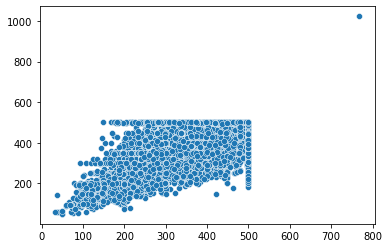

In [38]:
sns.scatterplot(x,y);

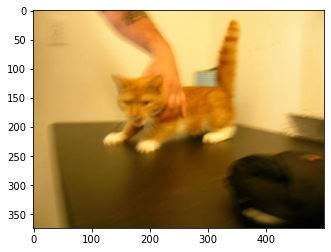

In [39]:
#show cat image
plt.imshow(imread(train_path + "\\cat\\cat.0.jpg"));

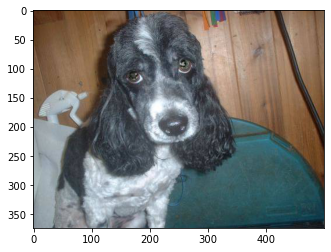

In [40]:
#show dog image
plt.imshow(imread(train_path + "\\dog\\2464.jpg"));

**Let's decide on the final dimension of these images.**

In [41]:
cat_img.shape

(374, 500, 3)

In [42]:
dog_img.shape

(374, 500, 3)

In [43]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (350,400,3)

In [44]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [45]:
#use ImageDataGenerator to manipulate the images

In [46]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

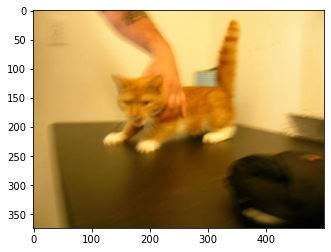

In [47]:
plt.imshow(cat_img);

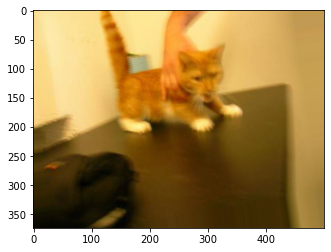

In [48]:
plt.imshow(image_gen.random_transform(cat_img));

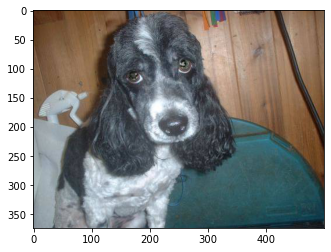

In [49]:
plt.imshow(dog_img);

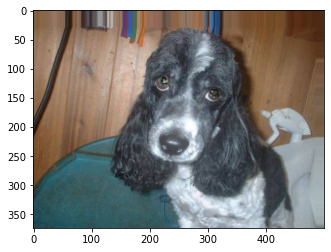

In [50]:
plt.imshow(image_gen.random_transform(dog_img));

In [51]:
#show transfromed version of dog image

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [52]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [53]:
image_gen.flow_from_directory(validation_path)

Found 2290 images belonging to 2 classes.


# Creating the Model

In [54]:
#create your CNN model here

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [56]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129024)            0

## Early Stopping

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [60]:
batch_size = 16

In [61]:
#use image_gen from above and read images from train and test set

    # yukarda yeni değiştirilmiş datalarla imageleri çoğaltmıştık ancak bunu kullanmamıştık. 
    # burada ise batch_size ile her bir fotoğraftan 15 tane daha (yukarda belirtilen özellikleri kullanarak)  
    # üretip bunları RAM'de tutuyor. 
    # ne zamanki fit etmeye başlayacak, o zaman yeni imageleri tek tek üretip eğitime sokacak, üretip eğitime sokacak.

In [62]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [63]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 17526 images belonging to 2 classes.


In [64]:
val_image_gen =  image_gen.flow_from_directory(validation_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary', 
                                                shuffle=False)

Found 2290 images belonging to 2 classes.


    # shuffle = False -->  bir ustteki test/val image ları karıştırma. 
    # onlar bir sıra dahilinde olduğu için ve test'te bunların sırası önemli olduğu için 
    # bunların sırasının bozulmasını istemiyorum.

In [65]:
#show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [66]:
#show class indices in train set
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
#fit your model using train and validation set
results = model.fit_generator(train_image_gen, 
                              epochs=20,
                              validation_data=val_image_gen, 
                              callbacks=[early_stop])

Epoch 1/20
1096/1096 [==============================] - 3804s 3s/step - loss: 0.6078 - Accuracy: 0.7112 - val_loss: 0.7138 - val_Accuracy: 0.5380
Epoch 2/20
 895/1096 [=======================>......] - ETA: 1:12:51 - loss: 0.5680 - Accuracy: 0.7202

KeyboardInterrupt: 

# Evaluating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
summary

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show();

In [ ]:
#

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show();

In [ ]:
model.metrics_names

In [ ]:
model.evaluate_generator(val_image_gen)

In [ ]:
#

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
preds = model.predict_generator(val_image_gen)

In [ ]:
preds 
# pred_probabilities

In [ ]:
# pred_probabilities

In [ ]:
val_image_gen.classes
# tahmin edilen classlar

In [ ]:
#

In [ ]:
predictions = preds > 0.5

In [ ]:
predictions

In [ ]:
# predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes, predictions))

In [ ]:
#

In [ ]:
confusion_matrix(val_image_gen.classes, predictions)

In [ ]:
# 

In [ ]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [ ]:
from PIL import Image

In [ ]:
# os.listdir(test_path)[0]
# img_test = imread(test_path + "10000.jpg")

In [ ]:
plt.imshow(img_test);

In [ ]:
type(img_test)

In [ ]:
#read 2749.jpg from test set

In [ ]:
plt.imshow(img_test)

In [ ]:
my_image  = img_test 

In [ ]:
# my_image = image.load_img(img_test, target_size=image_shape)
# my_image 

In [ ]:
# resize it as 128 * 128

In [ ]:
type(my_image)

In [ ]:
# my_image = image.img_to_array(my_image)
# my_image

In [ ]:
# turn the image into numpy array

In [ ]:
type(my_image)

In [ ]:
my_image.shape

In [ ]:
# my_image = np.expand_dims(my_image, axis=0)
# # SHAPE --> (number_of_images, width,height, color_channels)

In [ ]:
my_image.shape
# SHAPE --> (number_of_images, width,height, color_channels)

In [ ]:
#reshape it as below

In [ ]:
# image_prediction = model.predict(my_image)

In [ ]:
image_shape

In [ ]:
image_prediction=model.predict(my_image.reshape(1, 350, 400, 3))

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
classes[result[0]]

In [ ]:
model.save('cat_dog_detector.h5')

In [ ]:
# Predicting on an Image adimindaki reshape ve expand islemleri tek satirda burdaki gibi predict yaparken yapilabilir
# image_shape
# image_prediction=model.predict(my_image.reshape(1,32,32,3))
# SHAPE --> (number_of_images, width,height, color_channels)
# result=np.argmax(image_prediction, axis=1)
# classes[result[0]]
# model.save('cat_dog_detector.h5')

In [ ]:
#predict the image class with your model